# Realtor.com Data Extraction & Analysis

# Table of Contents
0.1__Realtor.com Search

0.2__View Page Source

0.3__Copy & Save Source

0.4__Repeat As Needed

1.1__Mount Google Drive

1.2__Change Directory

1.3__def get_home_data()

2.1__Load DataFrame

2.2__Sort DF by $/SQFT

2.3__Plot DF with Mean $/SQFT


# 0.1 Realtor.com Search

Conduct search on Realtor.com by zipcode or neighborhood.

![Realtor.com search](https://drive.google.com/uc?export=view&id=1-RcJ1ms93RLdKed_HxOAxKvoisXJcvss)

#0.2 View Page Source

Right click on the search page and click 'View Page Source'.

![View Page Source](https://drive.google.com/uc?export=view&id=1-SbyxsSpbG9oXSTiAOPKyPqy08tn5WK8)

#0.3 Copy & Save Source

Copy page source to a .txt document.  Create Google Drive folder /My_Drive/Colab_Notebooks/'search_zipcode' and save .txt to new Drive folder.

![Open TextEditor](https://drive.google.com/uc?export=view&id=1-Ta7gCRO0P8zUxsTqvrYE6iPQ2Nkk2XY)

![Create New GDrive file](https://drive.google.com/uc?export=view&id=1-qC1r5ibfFMmaWycgAWjvxaFM9_FzM-r)

![Save file in Drive](https://drive.google.com/uc?export=view&id=1-ccn8Ia4ThdWQHqRyXIDS0unui4c4tmx)

# 0.4 Repeat As Needed

For searches with multiple pages, navigate to next page and repeat steps 0.2 and 0.3.  Save additional page sources in same search folder.

![Repeat for each page](https://drive.google.com/uc?export=view&id=1-bbVAzUh1BesvRM8Cll0rkTaofLdPHoW)

# 1.1 Mount Google Drive

Mount Drive to get html data.

After RUN, go to URL provided and copy auth key.  Paste auth key and press enter/return.

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


# 1.2 Change Directory

Change current directory to directory with HTML Realtor.com data

In [2]:
%cd drive/My\ Drive/Colab\ Notebooks
%ls

/content/drive/My Drive/Colab Notebooks
44111_data/              realtor_data_analysis.ipynb
COVID-19_analysis.ipynb  utilities_data_2019.ipynb


# 1.3 def get_home_data() 

Loop through all files in directory and use BeautifulSoup to extract house data.  Append data to list 'house_data'.

Replace tgt_dir with your house data folder name:

tgt_dir = '44111_data' > tgt_dir = '[colab_folder_name]'

In [3]:
from bs4 import BeautifulSoup
import os
import glob
import json

house_data = []

def get_home_data():
  
  tgt_dir = '44111_data'

  files = glob.glob(os.path.join(tgt_dir, '*.txt'))

  n=1

  for f in files:

    print('Collecting page {} data...'.format(n))
    
    with open(f, 'r') as f :
        data = f.read()

    soup = BeautifulSoup(data, "html.parser")
    
    divs = soup.findAll('div', {'data-label':'property-card'})

    for div in divs:

        #house data required
        house = {
        'address' : [],
        'price' : [],
        'beds' : [],
        'baths' : [],
        'sqft' : [],
        'lot_sqft' : [],
        'pending_contingent' : []
        }

        #get house address

        address = div.find('div', {'data-label': 'pc-address'}).text
        house['address'] = address

        #print('Collecting data: ' + address)

        #get house price
        price = div.find('span', {'data-label':'pc-price'})
        if price != None:
          price = ''.join(filter(lambda x: x in ('1234567890.'), div.find('span', {'data-label':'pc-price'}).text))
          house['price'] = price
        else:
          house['price'] = ''

        #get number of bedrooms in house
        beds = div.find('li', {'data-label':'pc-meta-beds'})
        if beds != None:
          beds = ''.join(filter(lambda x: x in ('1234567890.'), div.find('li', {'data-label':'pc-meta-beds'}).text))
          house['beds'] = beds
        else:
          house['beds'] = ''

        #get number of bathrooms in house
        baths = div.find('li', {'data-label':'pc-meta-baths'})
        if baths != None:
          baths = ''.join(filter(lambda x: x in ('1234567890.'), div.find('li', {'data-label':'pc-meta-baths'}).text))
          house['baths'] = baths
        else:
          house['baths'] = ''
        
        #get total square footage
        sqft = div.find('li', {'data-label':'pc-meta-sqft'})
        if sqft != None:
          sqft = ''.join(filter(lambda x: x in ('1234567890.'), div.find('li', {'data-label':'pc-meta-sqft'}).text))
          house['sqft'] = sqft
        else:
          house['sqft'] = ''

        #get total lot square footage
        sqftlot = div.find('li', {'data-label':'pc-meta-sqftlot'})
        if sqftlot != None:
          sqftlot = ''.join(filter(lambda x: x in ('1234567890.'), div.find('li', {'data-label':'pc-meta-sqftlot'}).text))
          house['sqftlot'] = sqftlot
        else:
          house['sqftlot'] = ''

        house_data.append(house)

    print('Appending page {} data...'.format(n))
    n = n+1

  print(house_data) 
        
get_home_data()

Appending page 1 data...
Appending page 2 data...
Appending page 3 data...
[{'address': '3809 W 117th St, Cleveland, OH 44111', 'price': '44900', 'beds': '3', 'baths': '1', 'sqft': '912', 'lot_sqft': [], 'pending_contingent': [], 'sqftlot': '4800'}, {'address': '3980 Rocky River Dr, Cleveland, OH 44111', 'price': '59900', 'beds': '3', 'baths': '2', 'sqft': '1925', 'lot_sqft': [], 'pending_contingent': [], 'sqftlot': '0.4'}, {'address': '11505 Fidelity Ave, Cleveland, OH 44111', 'price': '119900', 'beds': '3', 'baths': '2.5', 'sqft': '2566', 'lot_sqft': [], 'pending_contingent': [], 'sqftlot': '5201'}, {'address': '3683 W 140th St, Cleveland, OH 44111', 'price': '65000', 'beds': '4', 'baths': '1.5', 'sqft': '1332', 'lot_sqft': [], 'pending_contingent': [], 'sqftlot': '5663'}, {'address': '3489 W 137th St, Cleveland, OH 44111', 'price': '139000', 'beds': '5', 'baths': '1.5', 'sqft': '2852', 'lot_sqft': [], 'pending_contingent': [], 'sqftlot': '4369'}, {'address': '3532 W 152nd St, Clevel

# 2.1 Load DataFrame

Import pandas and create DataFrame.

Create series for $/sqft.

In [ ]:
import pandas as pd
import numpy as np

df = pd.DataFrame(house_data)

df.replace('', np.nan, inplace=True)

df['$/sqft'] = (df['price'].astype(float)/df['sqft'].astype(float)).round(1)

avgPriceSQFT = round(df['$/sqft'].mean(), 1)

# 2.2 Sort DF by $/SQFT

Sort DataFrame by $/SQFT and print Top 10.

In [47]:
df.sort_values('$/sqft', ascending=True, inplace=True)

print('Top 10 highest profit potential:')
print(str(df[['address', '$/sqft']][:10]))

Top 10 highest profit potential:
                                     address  $/sqft
88      3314 W 100th St, Cleveland, OH 44111    18.4
87      3451 W 100th St, Cleveland, OH 44111    19.3
45      3053 W 105th St, Cleveland, OH 44111    19.6
96      3131 W 101st St, Cleveland, OH 44111    19.9
94     11213 Linnet Ave, Cleveland, OH 44111    25.0
93   10216 Ignatius Ave, Cleveland, OH 44111    25.5
32      3069 W 105th St, Cleveland, OH 44111    26.9
46      3396 W 117th St, Cleveland, OH 44111    30.6
1   3980 Rocky River Dr, Cleveland, OH 44111    31.1
86      3708 W 140th St, Cleveland, OH 44111    31.9


# 2.3 Plot DF with Mean $/SQFT

Use matplotlib to plot the DataFrame and the mean $/SQFT.

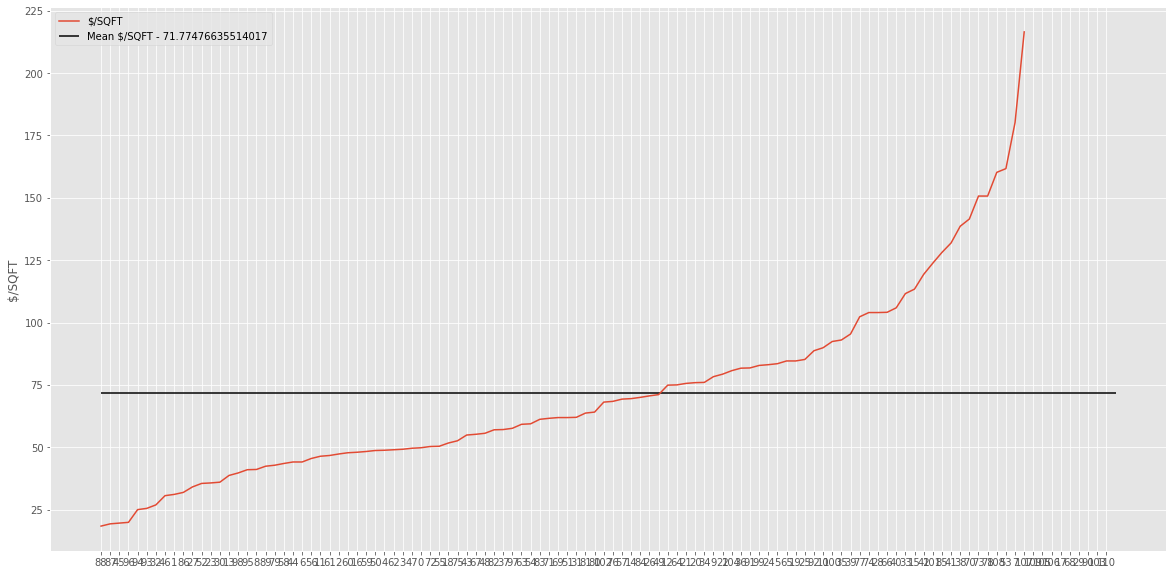

In [48]:
from matplotlib import pyplot as plt

plt.style.use("ggplot")
plt.figure(figsize=(20,10))
plt.plot(df['address'], df['$/sqft'], label='$/SQFT')
plt.hlines(avgPriceSQFT, 0, df['address'].size, label='Mean $/SQFT - {}'.format(avgPriceSQFT))
plt.ylabel('$/SQFT')
plt.xticks(range(len(df['address'].index)), df['address'].index)
plt.legend()
plt.show()